In [315]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
import math

In [316]:
font1 = {'family': 'Times New Roman',
             'weight': 'normal',
             'size': 15,
             }

df = pd.read_csv("../output/COVID_final.csv")

df = df[['id', 'location','rh_mean', 'rh_max', 'rh_min', 't2m_mean', 't2m_max', 't2m_min',
         'confirmed',
         'moveIn_index_mean', 'moveIn_index_max', 'moveIn_index_min',
         'moveOut_index_mean', 'moveOut_index_max', 'moveOut_index_min',
         'travel_index_mean', 'travel_index_max', 'travel_index_min',
         '420100_moveIn_mean', '420100_moveIn_max', '420100_moveIn_min', 'npp']]
df = df[~df['id'].isin(['371200', '710000'])] # 去除台湾和莱芜
df

,id,location,rh_mean,rh_max,rh_min,t2m_mean,t2m_max,t2m_min,confirmed,moveIn_index_mean,...,moveOut_index_mean,moveOut_index_max,moveOut_index_min,travel_index_mean,travel_index_max,travel_index_min,420100_moveIn_mean,420100_moveIn_max,420100_moveIn_min,npp
0,110000,北京市,46.496017,86.722396,17.081542,272.843342,284.989625,263.053292,580,4.460553,...,4.917454,23.914472,0.807311,3.281025,6.6375,1.3431,1.017742,2.21,0.07,6.25382
1,120000,天津市,46.401306,90.386729,10.992484,275.913800,288.570042,267.294000,174,1.958265,...,2.114363,7.012818,0.359802,3.656037,6.3527,1.4763,0.166129,0.32,0.00,7.12393
2,130100,石家庄市,52.495530,87.981583,19.951804,275.560786,288.740958,265.390500,29,1.461466,...,1.519247,4.087292,0.394826,3.702944,5.9427,1.7145,0.160645,0.29,0.00,2.14262
3,130200,唐山市,46.904882,93.551529,12.276571,274.775391,286.564375,265.588208,58,0.861429,...,0.857297,2.205662,0.200718,4.048301,5.9061,1.8941,0.001613,0.03,0.00,2.67739
4,130300,秦皇岛市,48.332962,89.614417,15.154958,273.486078,284.933333,262.464167,10,0.378024,...,0.397579,1.156615,0.081842,3.896601,5.7787,1.8130,0.000000,0.00,0.00,1.50255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,659002,阿拉尔市,48.158342,81.086542,19.870617,274.216063,288.034917,264.994958,0,0.040298,...,0.047811,0.177455,0.003110,2.532244,4.2042,0.5867,0.000000,0.00,0.00,0.66720
359,659003,图木舒克市,44.392681,81.028112,14.149744,276.443782,289.047417,267.745125,0,0.019915,...,0.023281,0.057251,0.001912,3.233440,4.9976,0.9690,0.000000,0.00,0.00,1.20936
360,659004,五家渠市,78.584650,102.987604,14.990040,265.573318,287.872083,250.613167,2,0.089543,...,0.084016,0.184032,0.015941,1.946355,3.3415,0.5857,0.000000,0.00,0.00,3.26684
361,659005,北屯市,76.934240,102.124792,30.104621,264.159054,280.935292,249.574333,0,0.040608,...,0.039931,0.138024,0.006383,2.805449,4.8881,0.4165,0.000000,0.00,0.00,1.92770


In [317]:
# feature importance 特征重要性
def feture_importance(features, indices, importances):
    print("%%%%%% feature importances %%%%%%")
    plt.barh(range(len(indices)), importances[indices], color='b', align='center', alpha=0.5)
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('feature Importance')
    plt.show()
    
# 评价指标
def evaluation(real_y, prediction_y):

    # rmse  mae r2
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(real_y, prediction_y)
    print("R-squared", r_value**2)
    print("R", r_value)

    mae = mean_absolute_error(real_y, prediction_y)
    print("mae", mae)

    rmse = mean_squared_error(real_y, prediction_y) ** 0.5
    print("rmse", rmse)


    figsize = 20,16
    figure, ax = plt.subplots(figsize=figsize)
    
    plt.subplot(1,2,1)

    plt.scatter(real_y, prediction_y, c='b', marker='o', label='', s=10, alpha=0.7, zorder=20)
    plt.plot([0, 50000], [0, 50000], '--', color='black', label='', linewidth=1.0)
    plt.tick_params(labelsize=15)

    plt.ylabel('prediction', font1)
    plt.xlabel('real', font1)
    ax = plt.gca()
    ax.set_aspect(1)
    
    plt.subplot(1,2,2)

    plt.scatter(real_y, prediction_y, c='b', marker='o', label='', s=10, alpha=0.7, zorder=20)
    plt.plot([0, 50000], [0, 50000], '--', color='black', label='', linewidth=1.0)
    plt.xlim(0, 5500)
    plt.ylim(0, 5500)
    plt.tick_params(labelsize=15)

    plt.ylabel('prediction', font1)
    plt.xlabel('real', font1)
    ax = plt.gca()
    ax.set_aspect(1)
    
    plt.show()

In [318]:
def covid_all_predict(df):

    real_y = []
    prediction_y = []

    kf = KFold(3, True)
    index = []
    for train_index, test_index in kf.split(df):
        index.append((train_index, test_index))

    clf = [RandomForestRegressor(n_estimators=10, min_samples_split=5, max_depth=5),
           RandomForestRegressor(n_estimators=10, min_samples_split=5, max_depth=5),
           RandomForestRegressor(n_estimators=10, min_samples_split=5, max_depth=5)]

    for i in range(len(index)):

        train_df = df.iloc[index[i][0], :]
        test_df = df.iloc[index[i][1], :]

        train_y = train_df['confirmed']
        #train_y = train_df['confirmed_before']
        #train_y = train_df['confirmed_after']

        #train_y = train_df['dead']
        train_x = train_df.drop(['id', 'location', 'confirmed'], axis=1)
        #train_x = train_df.drop(['id', 'location', 'confirmed_before', 'cured_before', 'dead_before'], axis=1)
        #train_x = train_df.drop(['id', 'location', 'confirmed_after', 'cured_after', 'dead_after'], axis=1)


        test_y = test_df['confirmed']
        #test_y = test_df['confirmed_before']
        #test_y = test_df['confirmed_after']
        #test_y = test_df['dead']
        test_x = test_df.drop(['id', 'location', 'confirmed'], axis=1)
        #test_x = test_df.drop(['id', 'location', 'confirmed_before', 'cured_before', 'dead_before'], axis=1)
        #test_x = test_df.drop(['id', 'location', 'confirmed_after', 'cured_after', 'dead_after'], axis=1)


        clf[i].fit(train_x, train_y)
        predict_y = clf[i].predict(test_x)

        real_y.extend(test_y)
        prediction_y.extend(predict_y)

        print("train fold " + str(i+1))
        predict_train_y = clf[i].predict(train_x)
        print("预测误差较大城市:")
        train_yy = train_y.to_list()
        for j in range(len(train_df)):
            if abs(train_yy[j]-predict_train_y[j])>800:
                print(train_df.iloc[j, 1] + "   real: " + str(train_yy[j]) + "   pre:" + str(predict_train_y[j]))
        evaluation(train_y, predict_train_y)
                
        print("#########################################")

        print("test fold " + str(i+1))
        print("预测误差较大城市:")
        test_yy = test_y.to_list()
        for j in range(len(test_df)):
            if abs(test_yy[j]-predict_y[j])>800:
                print(test_df.iloc[j, 1] + "   real: " + str(test_yy[j]) + "   pre:" + str(predict_y[j]))
        evaluation(test_y, predict_y)
        
        print("                             ")
        


    print("************* cv evaluation ***************")
    evaluation(real_y, prediction_y)

    # feature importance
    train_y = df['confirmed']
    #train_y = df['confirmed_before']
    #train_y = df['confirmed_after']
    # train_y = train_df['dead']
    train_x = df.drop(['id', 'location', 'confirmed'], axis=1)
    #train_x = df.drop(['id', 'location', 'confirmed_before', 'cured_before', 'dead_before'], axis=1)
    #train_x = df.drop(['id', 'location', 'confirmed_after', 'cured_after', 'dead_after'], axis=1)


    clf = RandomForestRegressor(n_estimators=10, min_samples_split=5, max_depth=5)
    clf.fit(train_x, train_y)
    print("%%%%%%%%%%%%% all sample model %%%%%%%%%%%%%%")
    evaluation(train_y, clf.predict(train_x))
    features = list(train_x)
    importances = clf.feature_importances_
    indices = np.argsort(importances)
    feture_importance(features, indices, importances)


In [319]:
# 随机森林建模疫情——全国城市，确诊人数不做log处理
# 高值城市预测较差，比如湖北那些城市，但是也会出现一些确诊人数为0-5城市预测达到几千甚至几万

train fold 1
预测误差较大城市:
武汉市   real: 50006   pre:35202.453571428574
R-squared 0.999770463125064
R 0.999885224975879
mae 75.81502051228067
rmse 954.08617860335


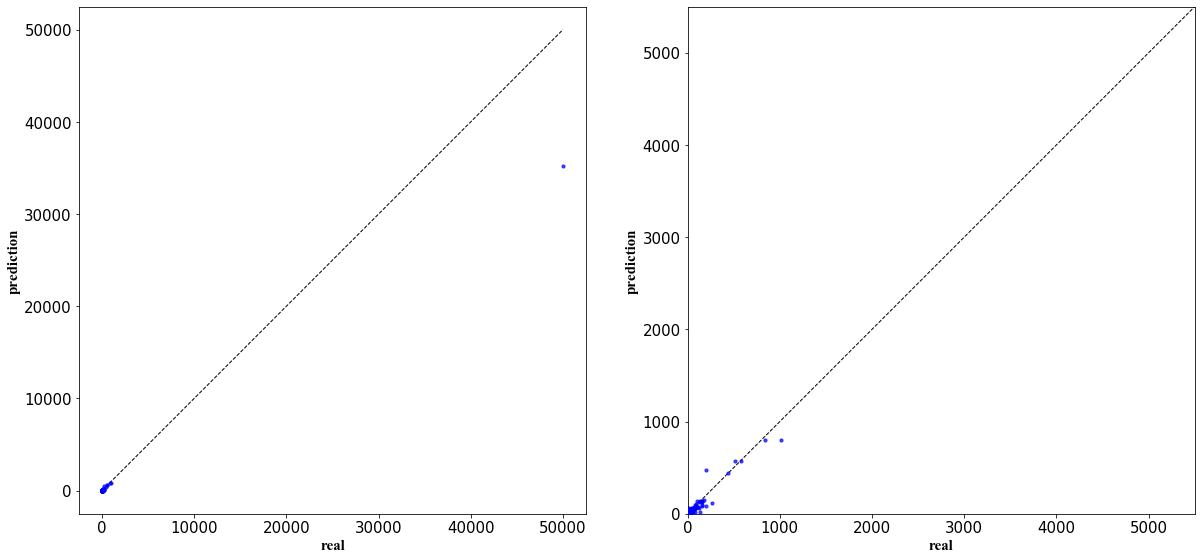

#########################################
test fold 1
预测误差较大城市:
孝感市   real: 3518   pre:795.0946825396826
黄冈市   real: 2907   pre:795.0946825396826
R-squared 0.6001826552400846
R 0.7747145637201386
mae 97.83507672010997
rmse 348.3607671072565


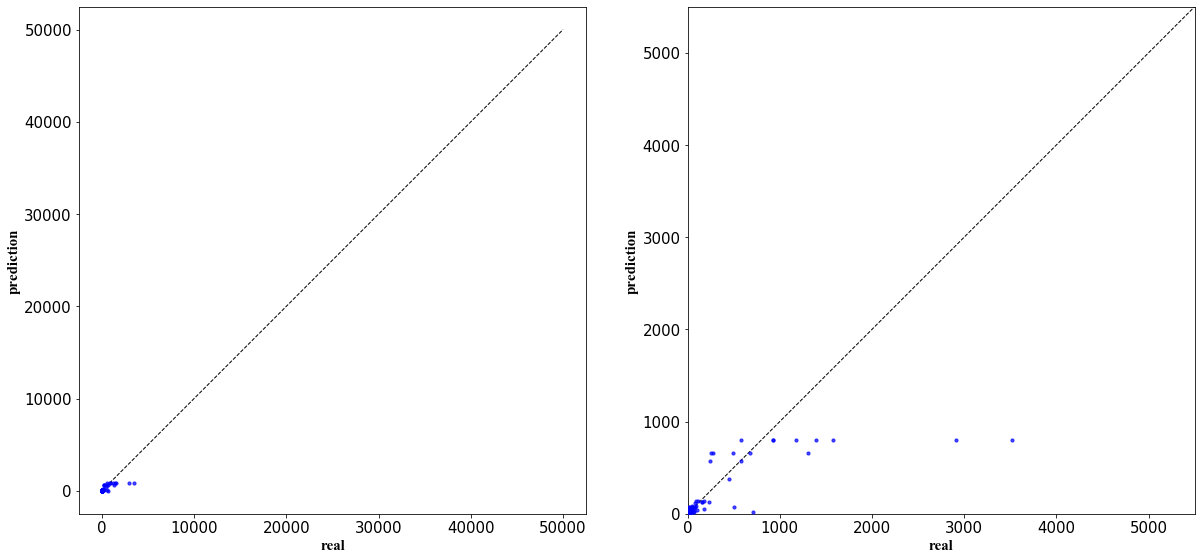

                             
train fold 2
预测误差较大城市:
孝感市   real: 3518   pre:2403.2412337662336
R-squared 0.9478696818155801
R 0.973585990971306
mae 30.185520309329135
rmse 91.88364847411202


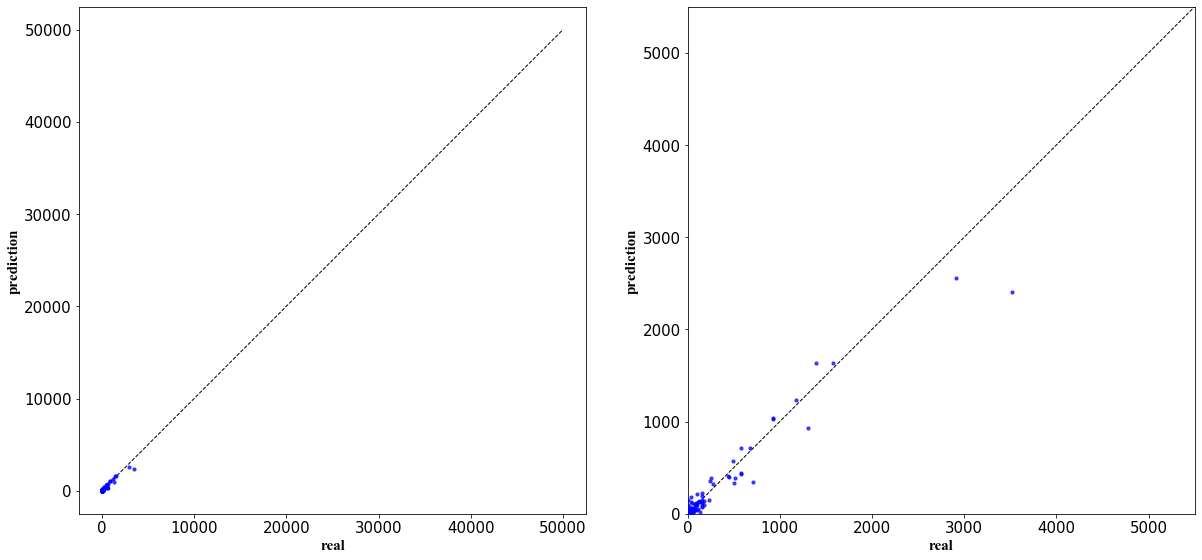

#########################################
test fold 2
预测误差较大城市:
武汉市   real: 50006   pre:2557.5412337662337
R-squared 0.6284814656550204
R 0.7927682294687524
mae 417.5594842499324
rmse 4314.274001536692


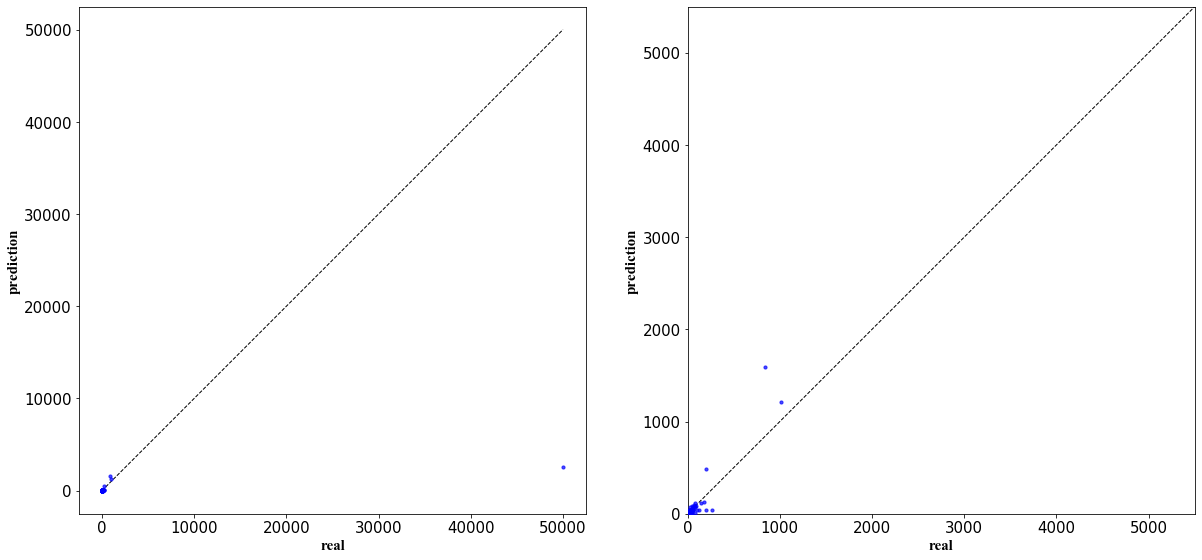

                             
train fold 3
预测误差较大城市:
武汉市   real: 50006   pre:35774.15
孝感市   real: 3518   pre:2556.9883333333337
香港特别行政区   real: 714   pre:5400.5575733870655
R-squared 0.9806036692760539
R 0.9902543457496432
mae 106.78297422163703
rmse 966.9892928845156


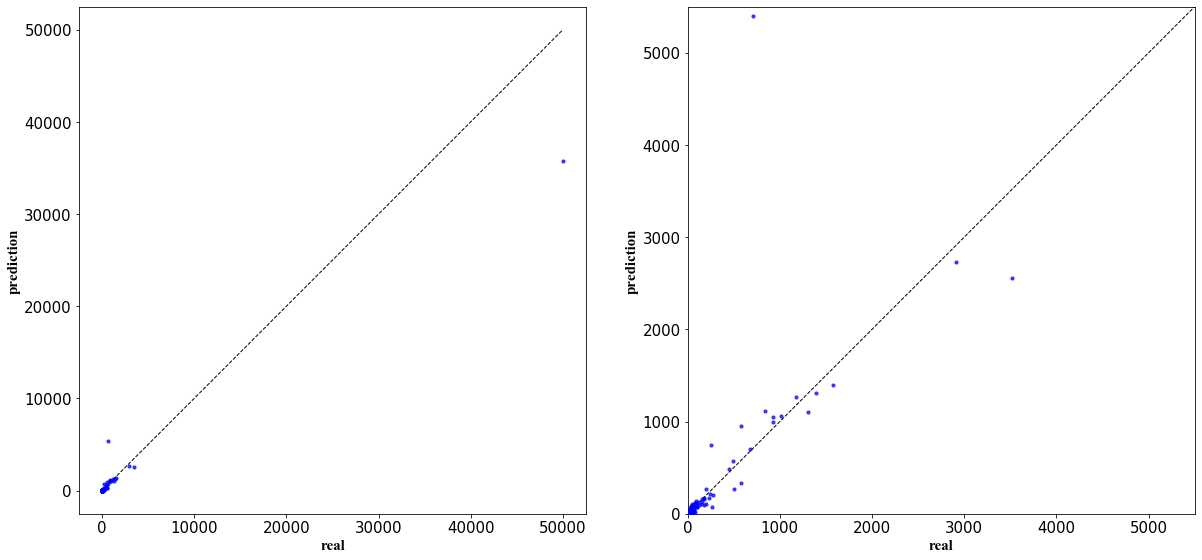

#########################################
test fold 3
预测误差较大城市:
阿里地区   real: 0   pre:5085.257677506685
五家渠市   real: 2   pre:5012.241169991212
R-squared 2.087206069746833e-05
R 0.004568595046342839
mae 111.96112679848645
rmse 655.0470323208954


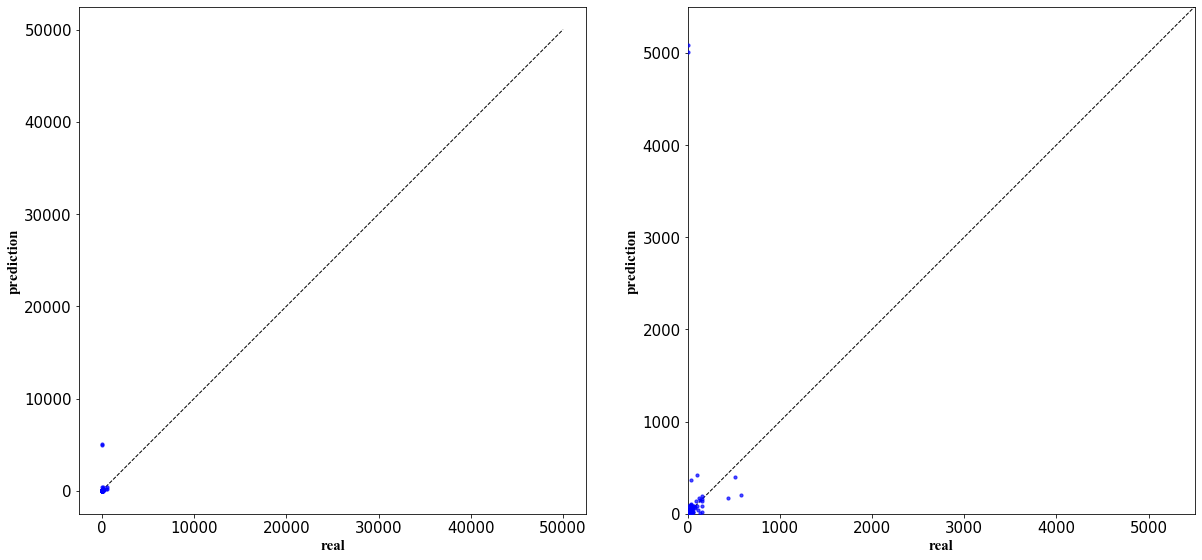

                             
************* cv evaluation ***************
R-squared 0.10964018707585277
R 0.3311195963331871
mae 209.38695329611463
rmse 2530.664182061775


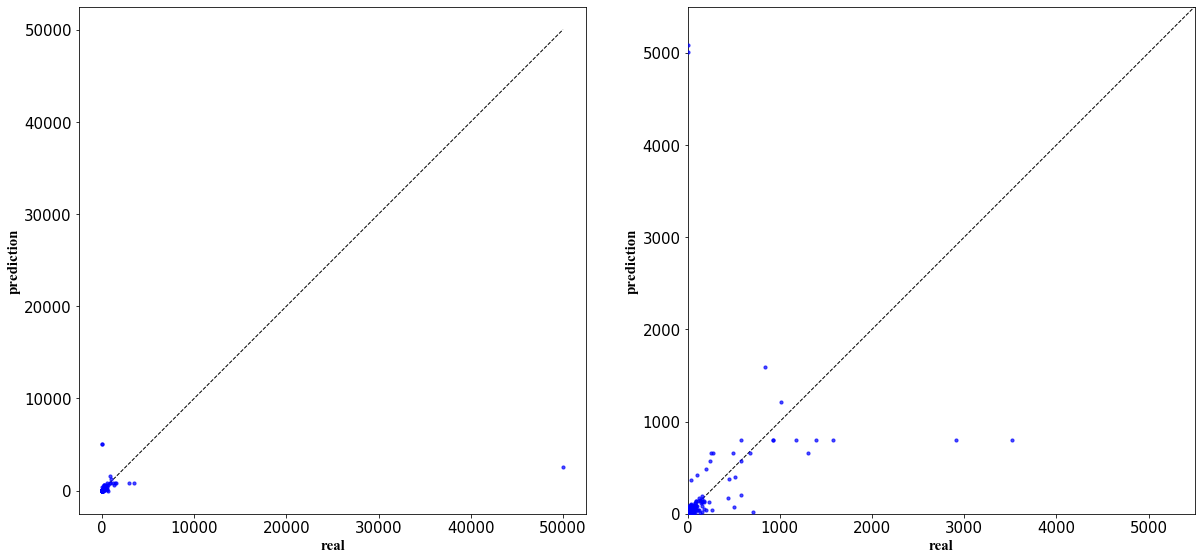

%%%%%%%%%%%%% all sample model %%%%%%%%%%%%%%
R-squared 0.8577159092328617
R 0.9261295315628704
mae 102.71209228505822
rmse 1064.5659015912238


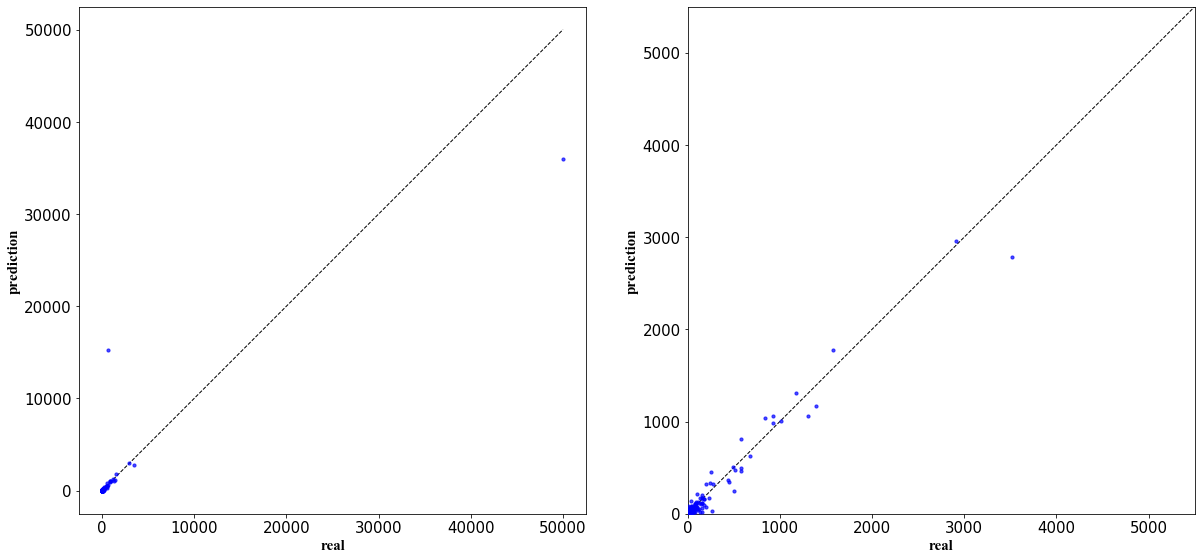

%%%%%% feature importances %%%%%%


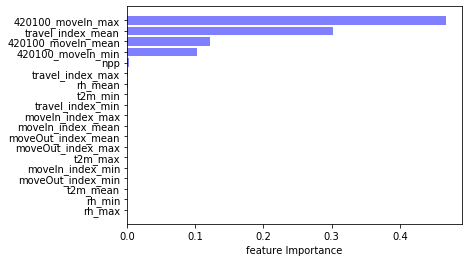

In [320]:
df1 = df[['id', 'location','rh_mean', 'rh_max', 'rh_min', 't2m_mean', 't2m_max', 't2m_min',
         'confirmed',
         'moveIn_index_mean', 'moveIn_index_max', 'moveIn_index_min',
         'moveOut_index_mean', 'moveOut_index_max', 'moveOut_index_min',
         'travel_index_mean', 'travel_index_max', 'travel_index_min',
         '420100_moveIn_mean', '420100_moveIn_max', '420100_moveIn_min', 'npp']]
covid_all_predict(df1)

In [321]:
df[(df['location'].isin(['阿里地区', '武汉市', '黄冈市', '随州市', '孝感市', '香港特别行政区', '五家渠市']))] 

,id,location,rh_mean,rh_max,rh_min,t2m_mean,t2m_max,t2m_min,confirmed,moveIn_index_mean,...,moveOut_index_mean,moveOut_index_max,moveOut_index_min,travel_index_mean,travel_index_max,travel_index_min,420100_moveIn_mean,420100_moveIn_max,420100_moveIn_min,npp
168,420100,武汉市,71.641574,98.844104,31.390192,282.450565,294.089083,274.252792,50006,1.441894,...,2.023355,11.840321,0.212155,1.722975,5.3340,0.5687,100.000000,100.00,100.00,6.210740
175,420900,孝感市,71.220821,98.873508,29.082767,281.658520,293.299625,273.262500,3518,0.581259,...,0.472132,1.164488,0.094478,2.987432,5.9112,1.3667,13.913226,17.67,10.41,0.946868
177,421100,黄冈市,73.670450,98.016054,37.838771,281.820969,293.489792,273.849833,2907,0.785669,...,0.582993,1.637885,0.102838,3.386525,6.4569,1.6993,13.977419,22.70,10.52,0.613669
179,421300,随州市,70.869639,97.576775,30.338342,281.006504,292.876125,272.773417,1307,0.238099,...,0.192810,0.527116,0.031007,2.924918,5.8408,1.1908,2.761613,4.15,1.38,0.398786
305,542500,阿里地区,55.037603,73.536887,35.708508,257.553897,267.711208,249.037208,0,0.003815,...,0.005285,0.016816,0.001134,1.901725,2.6877,1.4309,0.000000,0.00,0.00,0.226693
360,659004,五家渠市,78.584650,102.987604,14.990040,265.573318,287.872083,250.613167,2,0.089543,...,0.084016,0.184032,0.015941,1.946355,3.3415,0.5857,0.000000,0.00,0.00,3.266840
363,810000,香港特别行政区,78.458618,98.541542,37.033225,291.946578,296.756000,283.611292,714,0.247394,...,0.203531,0.798595,0.026050,1.780012,2.8099,0.9542,0.000000,0.00,0.00,17.883100


In [322]:
df[df['confirmed']==0]

,id,location,rh_mean,rh_max,rh_min,t2m_mean,t2m_max,t2m_min,confirmed,moveIn_index_mean,...,moveOut_index_mean,moveOut_index_max,moveOut_index_min,travel_index_mean,travel_index_max,travel_index_min,420100_moveIn_mean,420100_moveIn_max,420100_moveIn_min,npp
35,152900,阿拉善盟,37.460076,77.130896,10.485974,271.454380,285.738000,260.741708,0,0.138973,...,0.127751,0.282982,0.019537,4.200933,5.7514,2.3617,0.000000,0.00,0.0,0.313230
39,210400,抚顺市,53.614253,93.166404,22.659013,268.328880,282.521375,253.800333,0,0.276351,...,0.287769,0.571050,0.081130,4.171141,5.5384,2.2454,0.000000,0.00,0.0,1.130660
55,220600,白山市,64.456539,90.877408,26.230492,264.605360,279.024083,248.041625,0,0.100141,...,0.105081,0.250776,0.021967,3.844088,5.3060,1.8043,0.000000,0.00,0.0,0.452778
137,370500,东营市,53.890602,97.186767,17.651060,277.743397,290.667625,269.730083,0,0.391314,...,0.407123,1.057439,0.068008,5.171726,6.8429,2.5932,0.000000,0.00,0.0,2.428600
219,445300,云浮市,78.229968,95.574825,47.270446,290.574102,297.849458,281.515250,0,0.478476,...,0.395164,0.607727,0.146869,3.997597,5.2076,2.7247,0.000000,0.00,0.0,0.836622
233,451400,崇左市,81.466374,97.537413,47.484579,290.304263,297.722167,282.860583,0,0.386464,...,0.387383,0.963997,0.091951,4.297804,6.0758,2.4089,0.000000,0.00,0.0,0.405438
237,469001,五指山市,79.889544,96.126750,69.150208,293.308375,298.180250,284.781417,0,0.038218,...,0.041080,0.102190,0.009234,3.407967,4.5801,2.1485,0.000000,0.00,0.0,0.262019
243,469022,屯昌县,78.056228,91.142750,62.098121,295.374832,300.870125,286.682167,0,0.076877,...,0.072852,0.132224,0.023944,4.467760,6.4619,3.1276,0.000000,0.00,0.0,0.241374
246,469025,白沙黎族自治县,77.570953,92.037604,62.859008,295.069311,299.949375,286.450875,0,0.041509,...,0.043657,0.087804,0.010400,4.591907,5.9801,3.3353,0.000000,0.00,0.0,0.236464
297,533300,怒江傈僳族自治州,81.185284,96.467996,55.143287,274.737154,282.046333,266.951583,0,0.067497,...,0.078684,0.176126,0.014515,3.099416,3.6523,1.8266,0.000000,0.00,0.0,0.141352


In [323]:
# 阿里地区、五家渠市和香港地区，与湖北等城市对比来看，香港与随州在很多特征上相似，但是武汉迁入香港的比例为0，武汉迁入随州并不为0
# 百度平台只发布前100名，所以如果不在100名内，比例应该是可以视为0的
# 确诊人数为0的城市与这些城市对比来看，香港的夜光很高，五家渠和果洛藏族自治州的特征较为相似，不过五家渠的迁徙指数会稍高一些
# 或许还是像特征分析里的那样，许多确诊人数相近的城市，特征差异较大，上面37个确诊人数为0的城市，特征差异较大，相对湿度和气温跨度较大，导致模型学不好？？？
# 另外，不仅仅是阿里地区、五家渠市和香港地区，有的时候会会变成其他一些低值城市

In [324]:
# 随机森林建模疫情——全国城市，确诊人数做log处理，label范围被压缩的小很多，精度也提高很多
# 低值城市预测的结果几乎与y轴平行，误差较大
# 或许还是像特征分析里的那样，许多确诊人数相近的城市，特征差异较大，上面37个确诊人数为0的城市，特征差异较大，相对湿度和气温跨度较大，导致模型学

In [325]:
# 评价指标
def evaluation(real_y, prediction_y):

    # rmse  mae r2
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(real_y, prediction_y)
    print("R-squared", r_value**2)
    print("R", r_value)

    mae = mean_absolute_error(real_y, prediction_y)
    print("mae", mae)

    rmse = mean_squared_error(real_y, prediction_y) ** 0.5
    print("rmse", rmse)


    figsize = 12,12
    figure, ax = plt.subplots(figsize=figsize)
    
    plt.subplot(1,2,1)

    plt.scatter(real_y, prediction_y, c='b', marker='o', label='', s=10, alpha=0.7, zorder=20)
    plt.plot([0, 12], [0, 12], '--', color='black', label='', linewidth=1.0)
    plt.xlim(0, 12)
    plt.ylim(0, 12)
    plt.tick_params(labelsize=15)

    plt.ylabel('prediction', font1)
    plt.xlabel('real', font1)
    ax = plt.gca()
    ax.set_aspect(1)
    
    plt.show()

In [326]:
def covid_all_predict(df):

    real_y = []
    prediction_y = []

    kf = KFold(3, True)
    index = []
    for train_index, test_index in kf.split(df):
        index.append((train_index, test_index))

    clf = [RandomForestRegressor(n_estimators=10, min_samples_split=5, max_depth=5),
           RandomForestRegressor(n_estimators=10, min_samples_split=5, max_depth=5),
           RandomForestRegressor(n_estimators=10, min_samples_split=5, max_depth=5)]

    for i in range(len(index)):

        train_df = df.iloc[index[i][0], :]
        test_df = df.iloc[index[i][1], :]

        train_y = train_df['confirmed']
        #train_y = train_df['confirmed_before']
        #train_y = train_df['confirmed_after']

        #train_y = train_df['dead']
        train_x = train_df.drop(['id', 'location', 'confirmed'], axis=1)
        #train_x = train_df.drop(['id', 'location', 'confirmed_before', 'cured_before', 'dead_before'], axis=1)
        #train_x = train_df.drop(['id', 'location', 'confirmed_after', 'cured_after', 'dead_after'], axis=1)


        test_y = test_df['confirmed']
        #test_y = test_df['confirmed_before']
        #test_y = test_df['confirmed_after']
        #test_y = test_df['dead']
        test_x = test_df.drop(['id', 'location', 'confirmed'], axis=1)
        #test_x = test_df.drop(['id', 'location', 'confirmed_before', 'cured_before', 'dead_before'], axis=1)
        #test_x = test_df.drop(['id', 'location', 'confirmed_after', 'cured_after', 'dead_after'], axis=1)


        clf[i].fit(train_x, train_y)
        predict_y = clf[i].predict(test_x)

        real_y.extend(test_y)
        prediction_y.extend(predict_y)

        print("train fold " + str(i+1))
        predict_train_y = clf[i].predict(train_x)
        print("预测误差较大城市:")
        train_yy = train_y.to_list()
        for j in range(len(train_df)):
            if abs(train_yy[j]-predict_train_y[j])>1.5:
                print(train_df.iloc[j, 1] + "   real: " + str(train_yy[j]) + "   pre:" + str(predict_train_y[j]))
        evaluation(train_y, predict_train_y)
                
        print("#########################################")

        print("test fold " + str(i+1))
        print("预测误差较大城市:")
        test_yy = test_y.to_list()
        for j in range(len(test_df)):
            if abs(test_yy[j]-predict_y[j])>1.5:
                print(test_df.iloc[j, 1] + "   real: " + str(test_yy[j]) + "   pre:" + str(predict_y[j]))
        evaluation(test_y, predict_y)
        
        print("                             ")
        


    print("************* cv evaluation ***************")
    evaluation(real_y, prediction_y)

    # feature importance
    train_y = df['confirmed']
    #train_y = df['confirmed_before']
    #train_y = df['confirmed_after']
    # train_y = train_df['dead']
    train_x = df.drop(['id', 'location', 'confirmed'], axis=1)
    #train_x = df.drop(['id', 'location', 'confirmed_before', 'cured_before', 'dead_before'], axis=1)
    #train_x = df.drop(['id', 'location', 'confirmed_after', 'cured_after', 'dead_after'], axis=1)


    clf = RandomForestRegressor(n_estimators=10, min_samples_split=5, max_depth=5)
    clf.fit(train_x, train_y)
    print("%%%%%%%%%%%%% all sample model %%%%%%%%%%%%%%")
    evaluation(train_y, clf.predict(train_x))
    features = list(train_x)
    importances = clf.feature_importances_
    indices = np.argsort(importances)
    feture_importance(features, indices, importances)


train fold 1
预测误差较大城市:
济宁市   real: 5.564520407322694   pre:3.9528587421816503
云浮市   real: 0.0   pre:1.5447872779891465
甘孜藏族自治州   real: 4.3694478524670215   pre:2.6837751709592594
香港特别行政区   real: 6.5722825426940075   pre:3.8113574378014916
R-squared 0.9051018684379519
R 0.951368418877751
mae 0.43126629425768664
rmse 0.5740860249067902


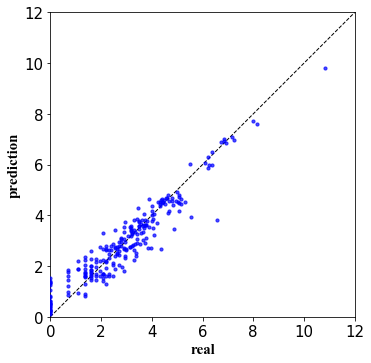

#########################################
test fold 1
预测误差较大城市:
厦门市   real: 3.58351893845611   pre:5.1300620525866965
迪庆藏族自治州   real: 0.0   pre:1.532474675716747
拉萨市   real: 0.6931471805599453   pre:2.940815678034121
海东市   real: 0.0   pre:2.1976451233151097
海西蒙古族藏族自治州   real: 0.0   pre:1.61468837333419
克拉玛依市   real: 0.0   pre:1.7996997553611205
阿克苏地区   real: 0.6931471805599453   pre:2.762919131285746
R-squared 0.8036901376666463
R 0.8964876673254609
mae 0.5316299616687858
rmse 0.7061905764938325


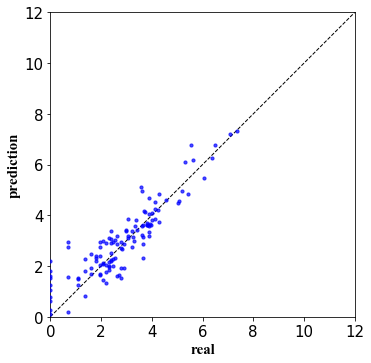

                             
train fold 2
预测误差较大城市:
抚顺市   real: 0.0   pre:1.6560168788811935
鸡西市   real: 3.8501476017100584   pre:2.13422888376721
甘孜藏族自治州   real: 4.3694478524670215   pre:2.6946276134872114
甘南藏族自治州   real: 2.1972245773362196   pre:0.6602444226730353
塔城地区   real: 0.0   pre:1.8892041407479359
R-squared 0.9004589676134233
R 0.9489251643904398
mae 0.39387353264870145
rmse 0.5244843964545471


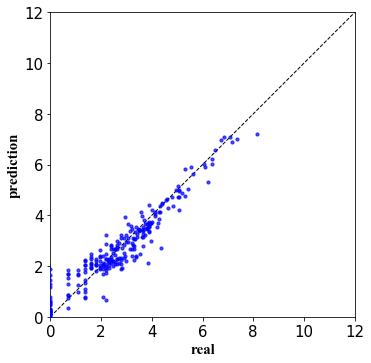

#########################################
test fold 2
预测误差较大城市:
白山市   real: 0.0   pre:1.661741692112777
齐齐哈尔市   real: 3.784189633918261   pre:2.050331556853884
七台河市   real: 2.8903717578961645   pre:0.18636799873410004
新余市   real: 4.875197323201151   pre:2.130877511726596
济宁市   real: 5.564520407322694   pre:3.648376243148738
武汉市   real: 10.819918274611197   pre:6.7272782739652985
云浮市   real: 0.0   pre:2.201897850810188
崇左市   real: 0.0   pre:1.9137775210405714
屯昌县   real: 0.0   pre:1.7575447329212612
伊犁哈萨克自治州   real: 2.9444389791664403   pre:1.4079031608842345
香港特别行政区   real: 6.5722825426940075   pre:2.8703347961600865
R-squared 0.7644393334799252
R 0.8743222137632815
mae 0.6123387694832566
rmse 0.9157241102704359


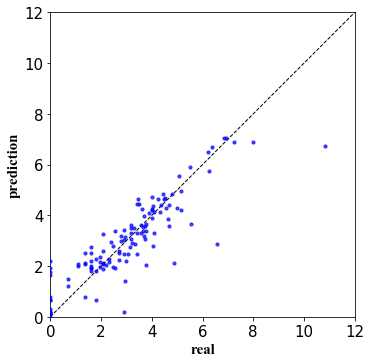

                             
train fold 3
预测误差较大城市:
七台河市   real: 2.8903717578961645   pre:1.1590788404008525
新余市   real: 4.875197323201151   pre:2.6771032940510424
济宁市   real: 5.564520407322694   pre:4.017914251415594
武汉市   real: 10.819918274611197   pre:9.147448520969828
云浮市   real: 0.0   pre:1.687869307811465
崇左市   real: 0.0   pre:1.5752005173018557
海东市   real: 0.0   pre:1.583449609685986
香港特别行政区   real: 6.5722825426940075   pre:4.938216078554088
R-squared 0.9178391987707663
R 0.9580392469887474
mae 0.3633670724670022
rmse 0.5044120541609914


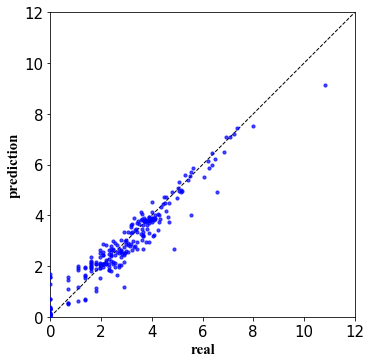

#########################################
test fold 3
预测误差较大城市:
抚顺市   real: 0.0   pre:1.999659735610079
哈尔滨市   real: 5.293304824724492   pre:3.4078869470843265
鸡西市   real: 3.8501476017100584   pre:0.5948203215942521
双鸭山市   real: 3.970291913552122   pre:0.5948203215942521
黑河市   real: 2.70805020110221   pre:0.5378589013996817
温州市   real: 6.22455842927536   pre:4.1623732155279916
蚌埠市   real: 5.081404364984463   pre:2.7891543414826603
东营市   real: 0.0   pre:1.9049192476640606
河池市   real: 3.367295829986474   pre:1.7819006421443782
甘孜藏族自治州   real: 4.3694478524670215   pre:0.32189217158901007
武威市   real: 0.0   pre:1.9724966703680036
甘南藏族自治州   real: 2.1972245773362196   pre:0.1325673652059947
塔城地区   real: 0.0   pre:2.3755115575829615
R-squared 0.6663129649042643
R 0.8162799549812946
mae 0.7421502196768739
rmse 1.0335806952549051


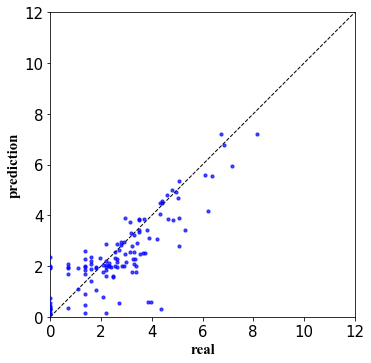

                             
************* cv evaluation ***************
R-squared 0.7336222008955102
R 0.856517484290607
mae 0.6283929359961934
rmse 0.8950487430536979


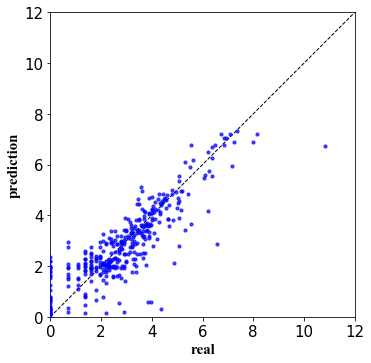

%%%%%%%%%%%%% all sample model %%%%%%%%%%%%%%
R-squared 0.8870757919608847
R 0.9418470109104157
mae 0.42890474055568417
rmse 0.5906930758262733


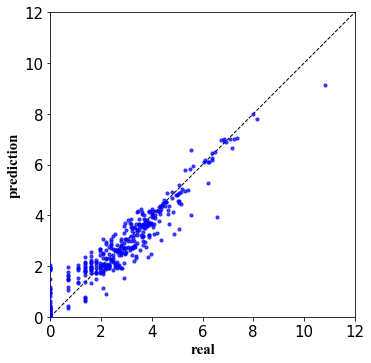

%%%%%% feature importances %%%%%%


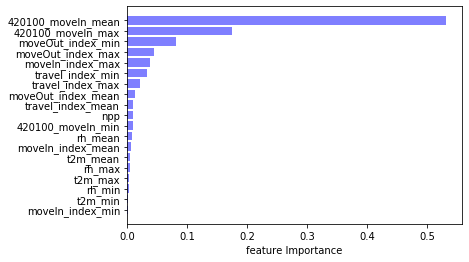

In [327]:
df2 = df[['id', 'location','rh_mean', 'rh_max', 'rh_min', 't2m_mean', 't2m_max', 't2m_min',
         'moveIn_index_mean', 'moveIn_index_max', 'moveIn_index_min',
         'moveOut_index_mean', 'moveOut_index_max', 'moveOut_index_min',
         'travel_index_mean', 'travel_index_max', 'travel_index_min',
         '420100_moveIn_mean', '420100_moveIn_max', '420100_moveIn_min', 'npp']]

confirmed = df['confirmed'].to_list()
confirmed = [math.log(i+1) for i in confirmed]
df2.loc[:, 'confirmed'] = confirmed

covid_all_predict(df2)